In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
hists=pd.read_pickle('histograms.pkl')

In [64]:
hists.head(10)

,0,1,2,3,4,5,6,7,8,9,...,760,761,762,763,764,765,766,767,768,769
0,25791,25773,25742,25782,25782,25773,25791,25787,25769,25773,...,25751,25742,25778,25787,25760,25769,25782,25769,25769,0
1,25755,25782,25769,25791,25746,25782,25787,25778,25755,25800,...,25769,25778,25809,25764,25796,25791,25805,25737,25742,0
2,25791,25805,25796,25800,25787,25827,25764,25796,25814,25778,...,25791,25823,25805,25800,25778,25778,25805,25800,25778,0
3,25778,25809,25742,25773,25805,25800,25791,25760,25796,25800,...,25805,25760,25787,25769,25782,25787,25764,25773,25778,0
4,25805,25796,25773,25782,25764,25760,25755,25773,25773,25724,...,25751,25764,25782,25800,25769,25778,25773,25764,25769,0
5,25755,25715,25764,25737,25724,25737,25742,25773,25724,25719,...,25697,25755,25724,25724,25706,25724,25742,25755,25773,0
6,25773,25769,25751,25760,25751,25746,25737,25746,25746,25764,...,25728,25737,25782,25733,25742,25782,25742,25778,25755,0
7,25755,25751,25791,25737,25760,25737,25791,25755,25751,25787,...,25760,25760,25737,25742,25746,25787,25742,25751,25746,0
8,25800,25764,25755,25782,25764,25764,25796,25746,25782,25755,...,25760,25782,25769,25769,25778,25746,25751,25764,25773,0
9,25796,25769,25787,25782,25764,25791,25764,25773,25778,25742,...,25778,25787,25787,25769,25769,25764,25796,25769,25791,0


In [65]:
hists.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2149 entries, 0 to 2148
Columns: 770 entries, 0 to 769
dtypes: int64(770)
memory usage: 12.6 MB


In [66]:
hists[769].value_counts()

1    1201
0     948
Name: 769, dtype: int64

In [67]:
X=hists.iloc[:,0:769]
y=hists.iloc[:,769]

In [68]:
X.shape

(2149, 769)

In [69]:
y.shape

(2149,)

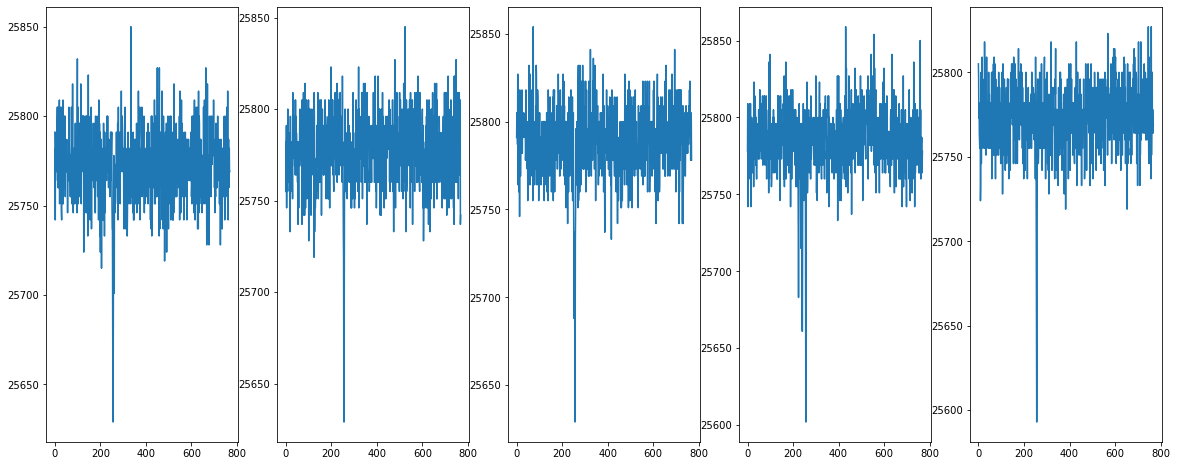

In [70]:
count=0
index=151
limit=5
plt.figure(figsize=[20,8])
for isto in range(0,2149):
    if (y[isto] == 0):
        plt.subplot(index)
        plt.plot(X.loc[isto])
        index+=1
        count+=1
    if count==limit: break

In [71]:
from sklearn import preprocessing
scaler1 = preprocessing.MinMaxScaler()

In [72]:
X = pd.DataFrame(data = scaler1.fit_transform(X.values.T).T, columns = X.columns)

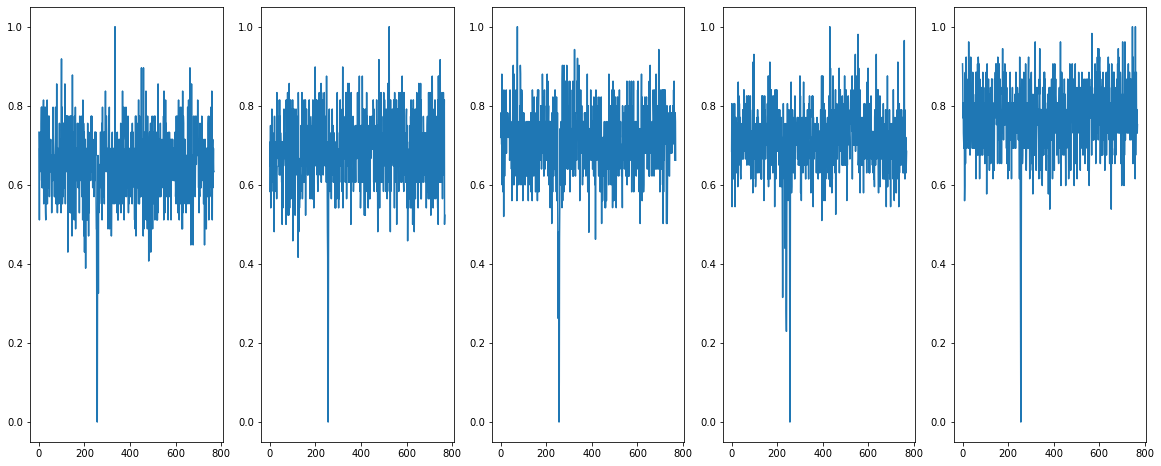

In [73]:
count=0
index=151
limit=5
plt.figure(figsize=[20,8])
for isto in range(0,2149):
    if (y[isto] == 0):
        plt.subplot(index)
        plt.plot(X.loc[isto])
        index+=1
        count+=1
    if count==limit: break

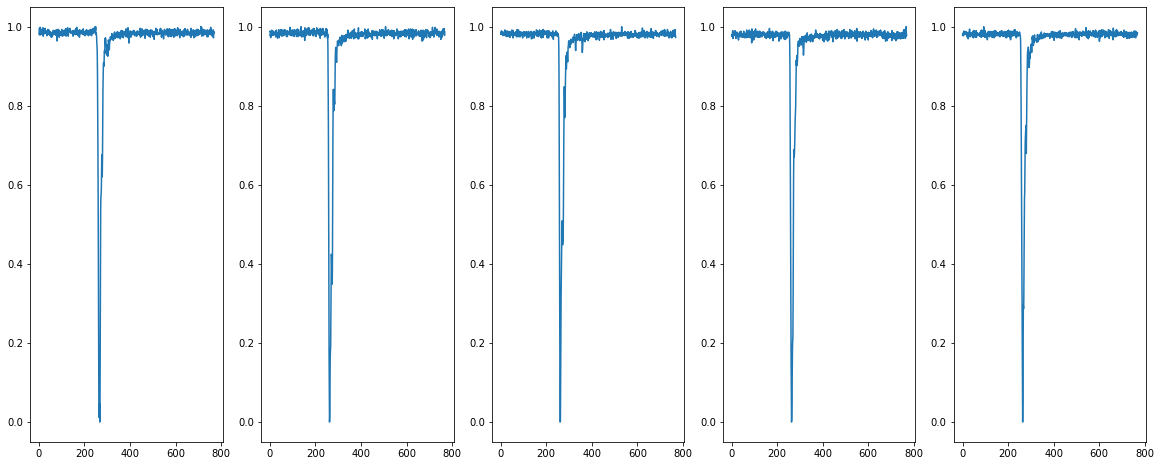

In [74]:
count=0
index=151
limit=5
plt.figure(figsize=[20,8])
for isto in range(0,2149):
    if (y[isto] == 1):
        plt.subplot(index)
        plt.plot(X.loc[isto])
        index+=1
        count+=1
    if count==limit: break

Baseline RF

In [75]:
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(n_estimators=1, n_jobs=10, random_state=42)

In [76]:
from sklearn.model_selection import train_test_split
train_set, test_set, train_labels, test_labels = train_test_split(X, y, test_size = 0.10, random_state = 42, shuffle=True,stratify=y)

In [77]:
clf.fit(train_set,train_labels)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1, n_jobs=10,
                       oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [78]:
preds=clf.predict(test_set)

In [79]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

print('\nAccuracy: {:.2f}\n'.format(accuracy_score(test_labels, preds)))

print('Micro Precision: {:.2f}'.format(precision_score(test_labels, preds, average='micro')))
print('Micro Recall: {:.2f}'.format(recall_score(test_labels, preds, average='micro')))
print('Micro F1-score: {:.2f}\n'.format(f1_score(test_labels, preds, average='micro')))

print('Macro Precision: {:.2f}'.format(precision_score(test_labels, preds, average='macro')))
print('Macro Recall: {:.2f}'.format(recall_score(test_labels, preds, average='macro')))
print('Macro F1-score: {:.2f}\n'.format(f1_score(test_labels, preds, average='macro')))

print('Weighted Precision: {:.2f}'.format(precision_score(test_labels, preds, average='weighted')))
print('Weighted Recall: {:.2f}'.format(recall_score(test_labels, preds, average='weighted')))
print('Weighted F1-score: {:.2f}'.format(f1_score(test_labels, preds, average='weighted')))


Accuracy: 1.00

Micro Precision: 1.00
Micro Recall: 1.00
Micro F1-score: 1.00

Macro Precision: 1.00
Macro Recall: 1.00
Macro F1-score: 1.00

Weighted Precision: 1.00
Weighted Recall: 1.00
Weighted F1-score: 1.00


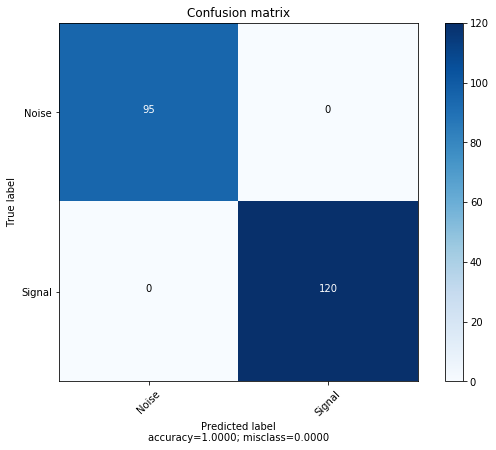

In [80]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import funzioni as fz
classes = ['Noise', 'Signal']
cm=confusion_matrix(test_labels, preds)
fz.plot_confusion_matrix(cm,target_names=classes, normalize=False,)

In [81]:
import xgboost as xgb

In [82]:
xg_reg = xgb.XGBClassifier(objective ='reg:logistic', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10, random_state=42)

In [83]:
xg_reg.fit(train_set,train_labels)

XGBClassifier(alpha=10, base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.3, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=10, n_jobs=0, num_parallel_tree=1,
              objective='reg:logistic', random_state=42, reg_alpha=10,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [84]:
preds = xg_reg.predict(test_set)

In [85]:
print('\nAccuracy: {:.2f}\n'.format(accuracy_score(test_labels, preds)))

print('Micro Precision: {:.2f}'.format(precision_score(test_labels, preds, average='micro')))
print('Micro Recall: {:.2f}'.format(recall_score(test_labels, preds, average='micro')))
print('Micro F1-score: {:.2f}\n'.format(f1_score(test_labels, preds, average='micro')))

print('Macro Precision: {:.2f}'.format(precision_score(test_labels, preds, average='macro')))
print('Macro Recall: {:.2f}'.format(recall_score(test_labels, preds, average='macro')))
print('Macro F1-score: {:.2f}\n'.format(f1_score(test_labels, preds, average='macro')))

print('Weighted Precision: {:.2f}'.format(precision_score(test_labels, preds, average='weighted')))
print('Weighted Recall: {:.2f}'.format(recall_score(test_labels, preds, average='weighted')))
print('Weighted F1-score: {:.2f}'.format(f1_score(test_labels, preds, average='weighted')))


Accuracy: 1.00

Micro Precision: 1.00
Micro Recall: 1.00
Micro F1-score: 1.00

Macro Precision: 1.00
Macro Recall: 1.00
Macro F1-score: 1.00

Weighted Precision: 1.00
Weighted Recall: 1.00
Weighted F1-score: 1.00


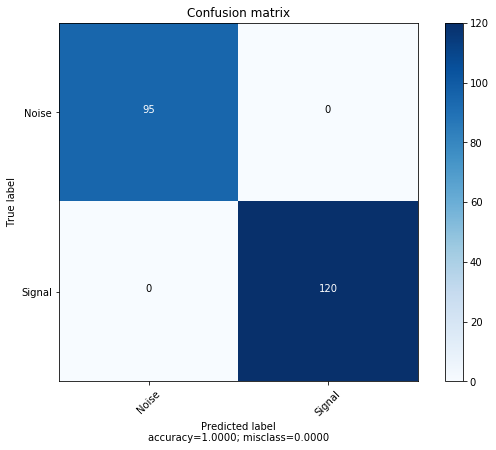

In [86]:
classes = ['Noise', 'Signal']
cm=confusion_matrix(test_labels, preds)
fz.plot_confusion_matrix(cm,target_names=classes, normalize=False,)

In [87]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

In [88]:
clf=RandomForestClassifier(n_estimators=500, criterion='entropy', max_depth=5, min_samples_split=2,
  min_samples_leaf=1, max_features='auto',    bootstrap=False, oob_score=False, n_jobs=1, random_state=42,
  verbose=0)

In [89]:
from sklearn.model_selection import cross_val_score
all_accuracies = cross_val_score(estimator=clf, X=train_set, y=train_labels, cv=10)

In [90]:
print(all_accuracies)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [96]:
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import auc
from sklearn.model_selection import StratifiedKFold
import matplotlib.pyplot as plt
%matplotlib inline
classifier=RandomForestClassifier(n_estimators=500, criterion='entropy', max_depth=5, min_samples_split=2,
  min_samples_leaf=1, max_features='auto',    bootstrap=False, oob_score=False, n_jobs=1, random_state=42,
  verbose=0)
cv = StratifiedKFold(n_splits=6)

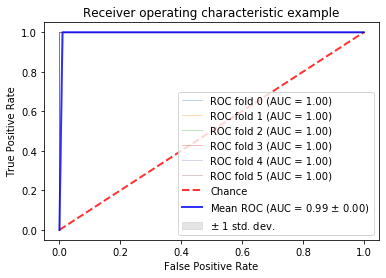

In [97]:
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

fig, ax = plt.subplots()
for i, (train, test) in enumerate(cv.split(X, y)):
    classifier.fit(X.values[train], y.values[train])
    viz = plot_roc_curve(classifier, X.values[test], y.values[test],
                         name='ROC fold {}'.format(i),
                         alpha=0.3, lw=1, ax=ax)
    interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(viz.roc_auc)

ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
        label='Chance', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
ax.plot(mean_fpr, mean_tpr, color='b',
        label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
        lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                label=r'$\pm$ 1 std. dev.')

ax.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05],
       title="Receiver operating characteristic example")
ax.legend(loc="lower right")
plt.show()



## Provo a classificare con il RF addestrato sugli istogrammi normalizzati i segnali scalati

In [37]:
import uproot4
scaled_positive = uproot4.open("positivi_scalati.root")

len y  822
len y  807
len y  872
len y  829
len y  817


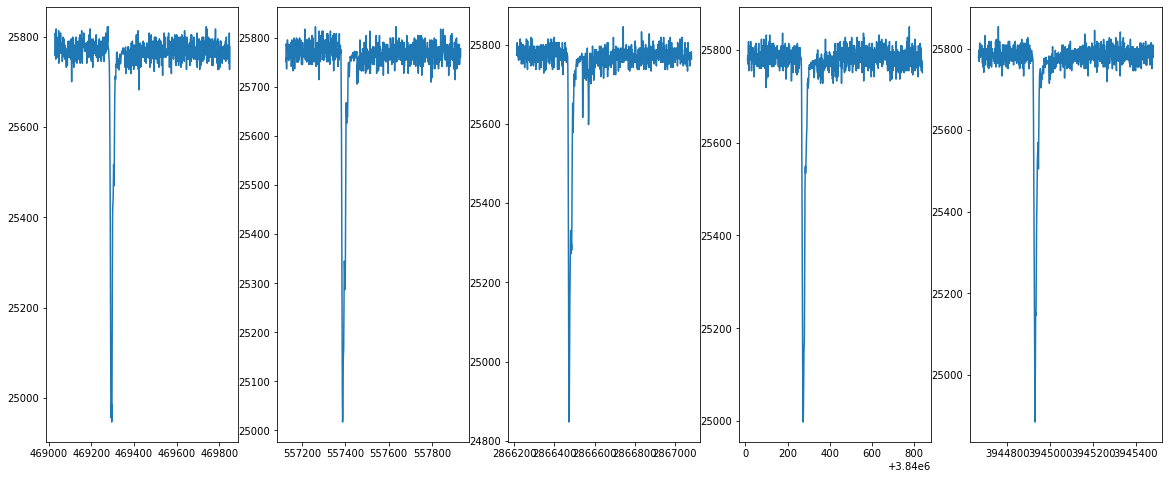

In [38]:
count=0
index=151
limit=5
plt.figure(figsize=[20,8])
for item in scaled_positive.classnames():
    hist=scaled_positive[item]
    X_scaled=hist.to_numpy()[1]
    y_scaled=hist.to_numpy()[0]
    plt.subplot(index)
    plt.plot(X_scaled[:-1],y_scaled)
    print('len y ', len(y_scaled))
    index+=1
    count+=1
    if count==limit: break

In [39]:
list_of_hist = []
for item in scaled_positive.classnames():
    y_scaled=scaled_positive[item].to_numpy()[0]
    list_of_hist.append(y_scaled[0:769])

In [40]:
len(list_of_hist)

1201

In [43]:
scaled_test=pd.DataFrame(list_of_hist, index=None)

In [44]:
scaled_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1201 entries, 0 to 1200
Columns: 769 entries, 0 to 768
dtypes: int64(769)
memory usage: 7.0 MB


In [53]:
preds=clf.predict(scaled_test)
labels=np.ones(1201)

In [60]:
print('\nAccuracy: {:.2f}\n'.format(accuracy_score(labels, preds)))

print('Micro Precision: {:.2f}'.format(precision_score(labels, preds, average='micro')))
print('Micro Recall: {:.2f}'.format(recall_score(labels, preds, average='micro')))
print('Micro F1-score: {:.2f}\n'.format(f1_score(labels, preds, average='micro')))

print('Macro Precision: {:.2f}'.format(precision_score(labels, preds, average='macro')))
print('Macro Recall: {:.2f}'.format(recall_score(labels, preds, average='macro')))
print('Macro F1-score: {:.2f}\n'.format(f1_score(labels, preds, average='macro')))

print('Weighted Precision: {:.2f}'.format(precision_score(labels, preds, average='weighted')))
print('Weighted Recall: {:.2f}'.format(recall_score(labels, preds, average='weighted')))
print('Weighted F1-score: {:.2f}'.format(f1_score(labels, preds, average='weighted')))


Accuracy: 1.00

Micro Precision: 1.00
Micro Recall: 1.00
Micro F1-score: 1.00

Macro Precision: 1.00
Macro Recall: 1.00
Macro F1-score: 1.00

Weighted Precision: 1.00
Weighted Recall: 1.00
Weighted F1-score: 1.00


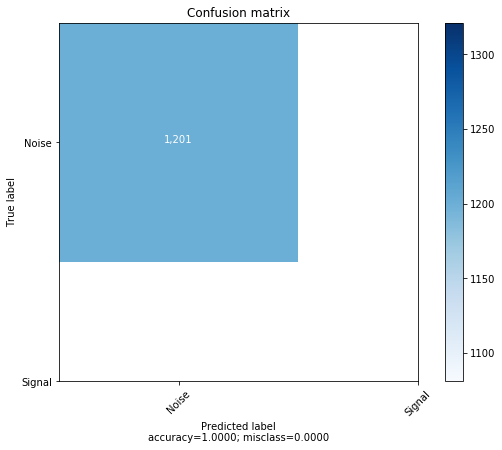

In [62]:
classes = ['Noise', 'Signal']
cm=confusion_matrix(labels, preds)
fz.plot_confusion_matrix(cm,target_names=classes, normalize=False,)